# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

Adapted from *Jake VanderPlas* http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

*University of Washington eScience Institute*

Uses data from [Fremont Bike Counter.](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k)

## Part 4: Working with Data and GitHub (cont'd)

We have duplicated the original Notebook to be able to preserve that work before making modifications that overwrite earlier work.

As noted in the original Notebook, the original version caused the data file to be downloaded every time the Notebook runs. We'll create a function to fix that then clean things up.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [20]:
# We'll use the os package to check whether the file exists

import os
from urllib.request import urlretrieve

import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns=['West', 'East']
    data['Total'] = data['West'] + data['East']
    return(data)

In [21]:
data = get_fremont_data()

In [22]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
01/31/2019 11:00:00 PM,7,6
01/31/2019 10:00:00 PM,13,16
01/31/2019 09:00:00 PM,18,27
01/31/2019 08:00:00 PM,32,33
01/31/2019 07:00:00 PM,40,94
01/31/2019 06:00:00 PM,68,246
01/31/2019 05:00:00 PM,106,399
01/31/2019 04:00:00 PM,84,219
01/31/2019 03:00:00 PM,60,97


In [23]:
data.shape

(55488, 3)

In [24]:
data.head()

,West,East,Total
Date,,,
2019-01-31 23:00:00,7.0,6.0,13.0
2019-01-31 22:00:00,13.0,16.0,29.0
2019-01-31 21:00:00,18.0,27.0,45.0
2019-01-31 20:00:00,32.0,33.0,65.0
2019-01-31 19:00:00,40.0,94.0,134.0


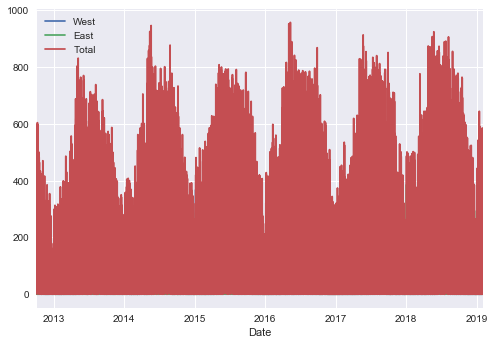

In [25]:
data.plot();

This is very busy, so let's look at weekly sums.

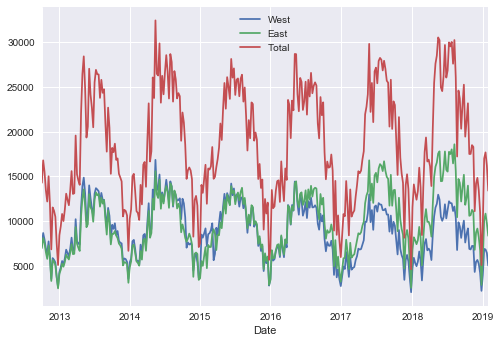

In [26]:
data.resample('W').sum().plot();

In [27]:
data.describe()

,West,East,Total
count,55479.000000,55479.000000,55479.000000
mean,52.431316,58.315272,110.746589
std,67.826311,84.737058,139.847765
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,70.000000,144.000000
max,698.000000,717.000000,957.000000


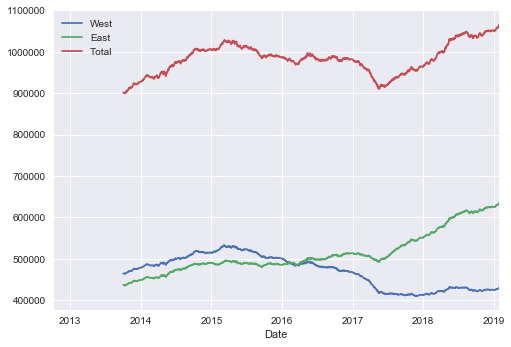

In [28]:
data.resample('D').sum().rolling(365).sum().plot();

This shows an annual trend with each point being the sum of the previous 365 days.

Adjust Y-axis to be zero-based.

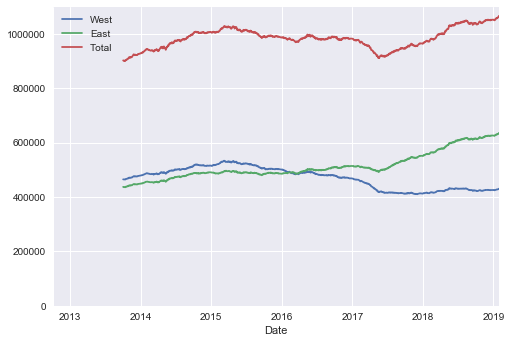

In [29]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

Now let's look at the trend within individual days.

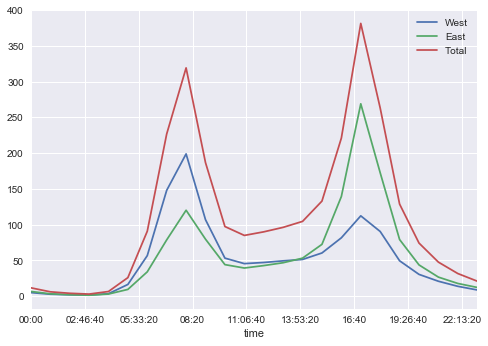

In [31]:
data.groupby(data.index.time).mean().plot();

This reveals a typical commute pattern with a westbound peak in the morning and an eastbound peak in the afternoon.

It would also be nice to see the whole dataset in this way.

In [32]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.shape

(24, 2312)

What does the first 5x5 block look like in this pivot table?

In [33]:
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


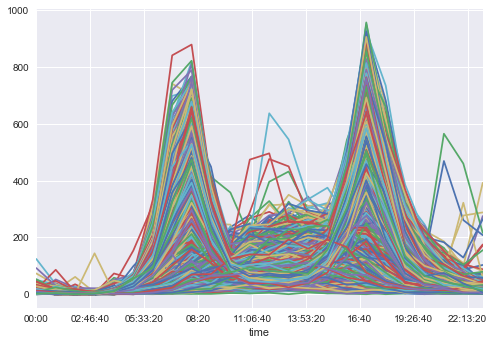

In [34]:
pivoted.plot(legend=False);

This plot has a line for each day for all of the years, so let's change the transparency of each line.

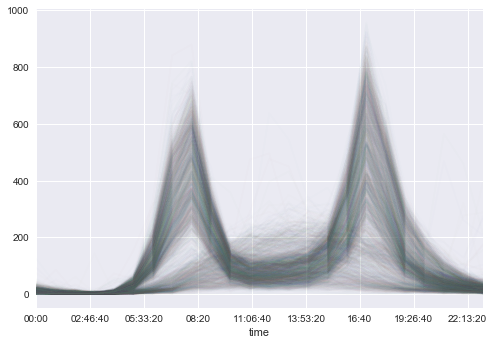

In [35]:
pivoted.plot(legend=False, alpha=0.01);

Now we see that there are days with the commute pattern and days (maybe weekends?) with more of a midday pattern.

## Part 3: Version Control with Git & GitHub

At this point, it's important to be sure that you have a Notebook that flows well before working on the next steps.